******IMPORT THE LIBRARY******

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


******LOAD THE DATA******

In [14]:
df = pd.read_csv('heartdiseases.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


******DATA TRANSFORMATION******

In [15]:
# Renaming columns for better readability
df.columns = [
    'age', 'sex', 'chest_pain_type', 'resting_bp', 'serum_cholesterol', 
    'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 
    'oldpeak', 'slope', 'major_vessels', 'thal', 'target' 
]


df.head()


,age,sex,chest_pain_type,resting_bp,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,major_vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


******BASIC EXPLORATORY DATA ANALYSIS******

****BASIC STATICS****

In [16]:
df.describe()


,age,sex,chest_pain_type,resting_bp,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,major_vessels,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


****CHECKING FOR MISSING VALUE****

In [17]:
df.isnull().sum()


age                    0
sex                    0
chest_pain_type        0
resting_bp             0
serum_cholesterol      0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
major_vessels          0
thal                   0
target                 0
dtype: int64

******HEART DISEASE RATE******

heart_disease
1    51.317073
0    48.682927
Name: proportion, dtype: float64


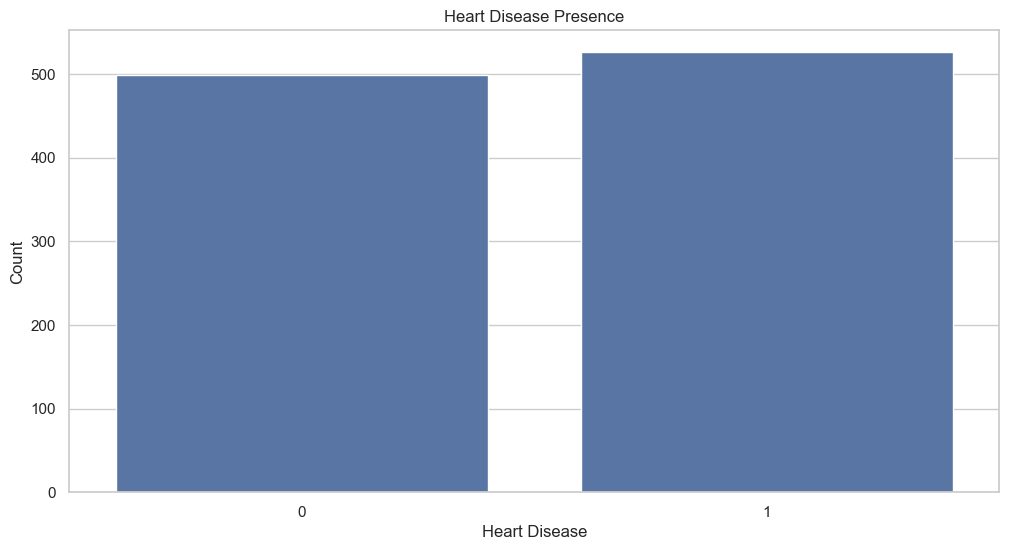

In [18]:

df['heart_disease'] = df['target']  
heart_disease_rate = df['heart_disease'].value_counts(normalize=True) * 100
print(heart_disease_rate)


sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


******HEART DISEASE BY GENDER******

heart_disease          0          1
sex                                
0              27.564103  72.435897
1              57.924264  42.075736


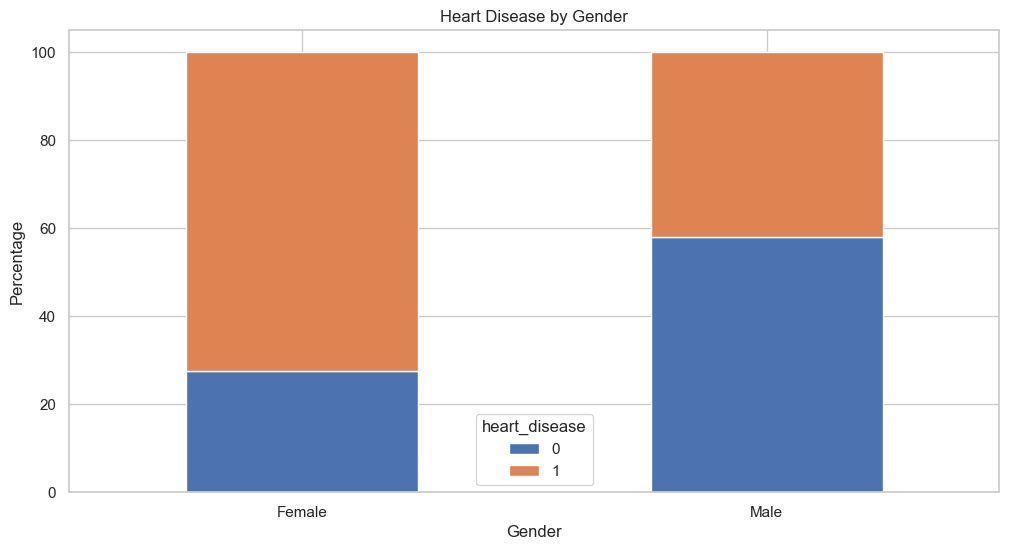

******HEART DISEASE BY AGE******

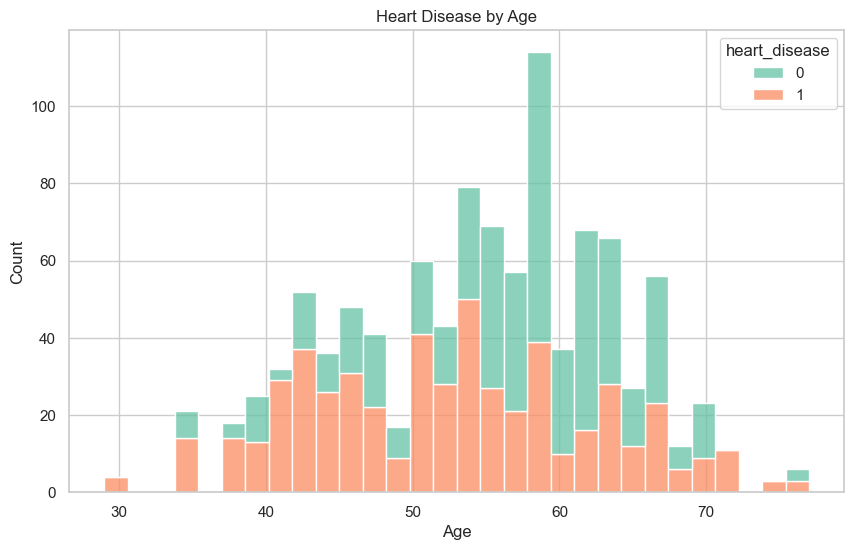

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='heart_disease', multiple='stack', bins=30, palette='Set2')
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


******CORRELATION MATRIX******

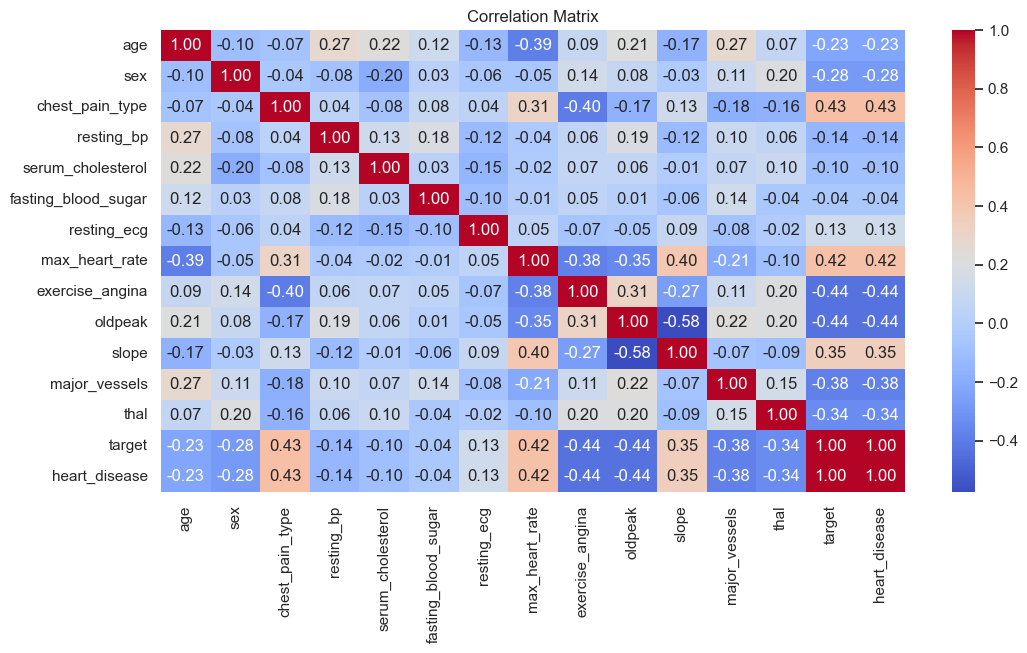

In [11]:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
